In [1]:
import numpy as np
import numpy.random as rd
import scipy.stats as st
import pandas as pd
from tabulate import tabulate

import math

import copy, sys
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [2]:
P = [[0.3, 0.3, 0.4],
     [0.1, 0.5, 0.4],
     [0.2, 0.6, 0.2]]

In [3]:
def calc(x, l, num):
    tmp = copy.copy(x)
    for i in range(num):
        tmp = np.dot(tmp,P)
        l.append(tmp)

In [4]:
result = []
init = [0.6,0.25,0.15]
result.append(init)
calc(init,result,10)

In [5]:
print(tabulate(np.array(result),["A","B","C"],tablefmt="pipe"))

|        A |        B |        C |
|---------:|---------:|---------:|
| 0.6      | 0.25     | 0.15     |
| 0.235    | 0.395    | 0.37     |
| 0.184    | 0.49     | 0.326    |
| 0.1694   | 0.4958   | 0.3348   |
| 0.16736  | 0.4996   | 0.33304  |
| 0.166776 | 0.499832 | 0.333392 |
| 0.166694 | 0.499984 | 0.333322 |
| 0.166671 | 0.499993 | 0.333336 |
| 0.166668 | 0.499999 | 0.333333 |
| 0.166667 | 0.5      | 0.333333 |
| 0.166667 | 0.5      | 0.333333 |


In [6]:
init = [0, 0, 100]

In [7]:
next_state = np.array([0, 0, 0])
result = []
result.append(init)
for k in range(10):#150000):
    next_state = [0, 0, 0]
    for i, num in enumerate(init):
        for j in range(num):
            next_state = next_state + rd.multinomial(1, P[i])
    result.append(next_state)
    init = copy.copy(next_state)

In [8]:
n_burn_in = 1

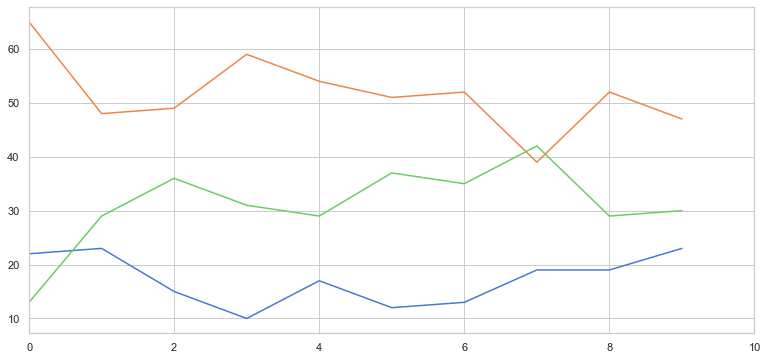

In [9]:
plt.figure(figsize=(13,6))
plt.plot(result[n_burn_in:])
plt.xlim(0, len(result)-n_burn_in)
plt.show()

In [10]:
result[n_burn_in:]

[array([22, 65, 13]),
 array([23, 48, 29]),
 array([15, 49, 36]),
 array([10, 59, 31]),
 array([17, 54, 29]),
 array([12, 51, 37]),
 array([13, 52, 35]),
 array([19, 39, 42]),
 array([19, 52, 29]),
 array([23, 47, 30])]

In [167]:
prop_m = 3
prop_sd = 0.5 #np.sqrt(0.5)

def f_gamma(x):
    k = 11
    t = 13
    return  x**(k-1) * np.exp(-t*x)

def q(theta):
    return st.norm.pdf(theta, loc=prop_m, scale=prop_sd)

def rand_prop():
    return st.norm.rvs(prop_m, prop_sd)

Text(0.5, 1.0, 'Posterior Distribution')

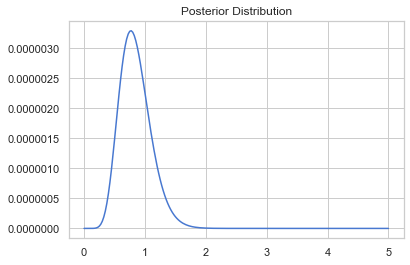

In [168]:
x = np.linspace(0,5,201)

plt.plot(x,f_gamma(x))
plt.title("Posterior Distribution")

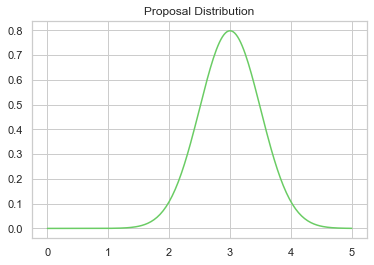

In [169]:
plt.title("Proposal Distribution")
plt.plot(x, q(x), "g")

In [170]:
theta = []

# Initial value
current = 3
theta.append(current)

n_itr = 100000

for i in range(n_itr):
    # 提案分布からの乱数生成
    a = rand_prop()
    if a < 0:
        theta.append(theta[-1])
        continue

    r = (q(current)*f_gamma(a)) / (q(a)*f_gamma(current))
    assert r > 0
    
    if r < 0:
        #reject
        theta.append(theta[-1])
        continue
    if r >= 1 or r > st.uniform.rvs():#乱数を発生させて、rよりも大きい場合に受容させる
        # Accept
        theta.append(a)
        current = a
    else:
        #Reject
        theta.append(theta[-1])

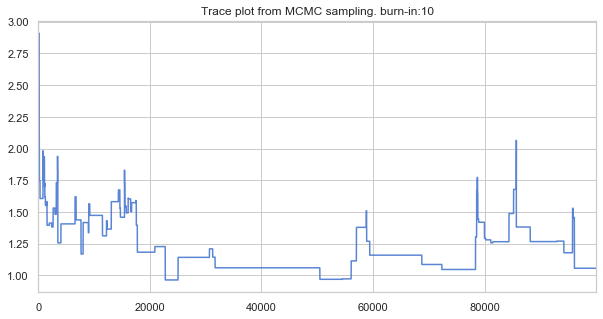

In [171]:
n_burn_in = 10
plt.figure(figsize=(10,5))
plt.xlim(0, len(theta)-n_burn_in)
plt.title("Trace plot from MCMC sampling. burn-in:{}".format(n_burn_in))
plt.plot(theta[n_burn_in:], alpha=0.9)

C:\Users\lllni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


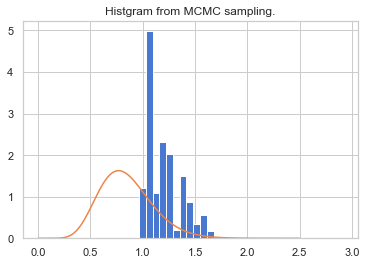

In [172]:
plt.title("Histgram from MCMC sampling.")
plt.hist(theta[n_burn_in:], bins=30, normed=True)

xx = np.linspace(0, 2.5,501)
plt.plot(xx, st.gamma(11, 0, 1/13.).pdf(xx))
plt.show()

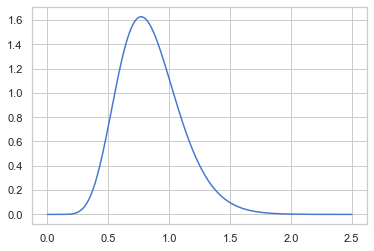

In [34]:
plt.plot(xx, st.gamma(a=11, loc=0, scale=1/13.).pdf(xx))
plt.show()

In [64]:
n_burn_in

10

In [79]:
number = st.uniform.rvs(loc=0, scale=1, size=1)
aa = 0.5

In [95]:
aa = 0.5
for i in range(10):
    print(aa > st.uniform.rvs())
    

False
False
False
False
False
True
True
True
False
False


 ランダムウォークMH

In [136]:
prop_m = 1
prop_sd = 0.5 #np.sqrt(0.5)

def f_gamma(x):
    k = 11
    t = 13
    return  x**(k-1) * np.exp(-t*x)

def q(theta):
    return st.norm.pdf(theta, loc=prop_m, scale=prop_sd)

def rand_prop(m):
    return st.norm.rvs(m, prop_sd)

Traceback (most recent call last):
  File "C:\Users\lllni\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\lllni\Anaconda3\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\Users\lllni\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Users\lllni\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1758, in _draw_frame
    raise RuntimeError('The animation function must return a '
RuntimeError: The animation function must return a sequence of Artist objects.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


IndexError: list index out of range

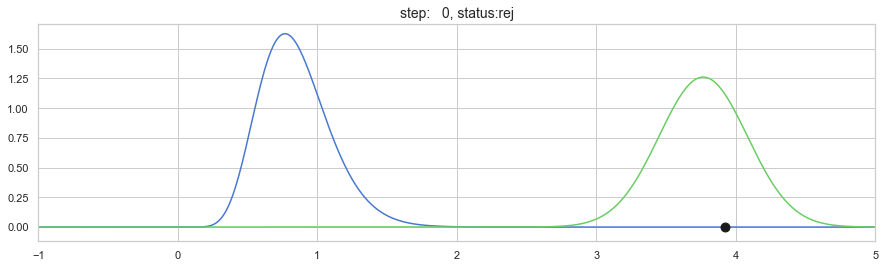

In [138]:
# Generate Animation
theta = []
current  = 4
theta.append(current)

prop_sd = np.sqrt(0.10)
x = np.linspace(-1,5,501)

def animate(nframe):
    global current
    
    plt.clf()
    plt.xlim(-1,5)
    
    a = rand_prop(current)  # 提案分布からの乱数生成
    r = f_gamma(a) / f_gamma(current)
    
    if a < 0 or r < 0:
        #reject
        theta.append(theta[-1])
        status = "rej"
        col = "r"
    elif r >= 1 or r > st.uniform.rvs():
        # Accept
        theta.append(a)
        current = a
        status = "acc"
        col = "r"
    else:
        #Reject
        theta.append(theta[-1])
        status = "rej"
        col = "k"

    plt.plot(x, st.gamma(11, 0, 1/13.).pdf(x))
    plt.plot(x, st.norm.pdf(x, loc=current, scale=prop_sd), "g")
    
    plt.scatter([a], [0.], s=80, c=col ,zorder=100)
    
    plt.title("step:{0:>4}, status:{1}".format(nframe, status), size=14)

num_frame = 200.
fig = plt.figure(figsize=(15,4))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('randomwalk_mh2.gif', writer='imagemagick', fps=5, dpi=64)

In [183]:
# MCMC sampling

theta = []
current  = 5
theta.append(current)
n_itr = 100000
prop_m = 5
prop_sd = np.sqrt(0.10)
x = np.linspace(-1,5,501)

def rand_prop1(prop_m):
    return st.norm.rvs(prop_m, prop_sd)

for i in range(n_itr):
    a = rand_prop1(current)  # 提案分布からの乱数生成
    r = f_gamma(a) / f_gamma(current)
    
    if a < 0 or r < 0:
        #reject
        theta.append(theta[-1])
        pass
    elif r >= 1 or r > st.uniform.rvs():
        # Accept
        theta.append(a)
        current = a
        status = "acc"
        col = "r"
    else:
        #Reject
        theta.append(theta[-1])
        pass

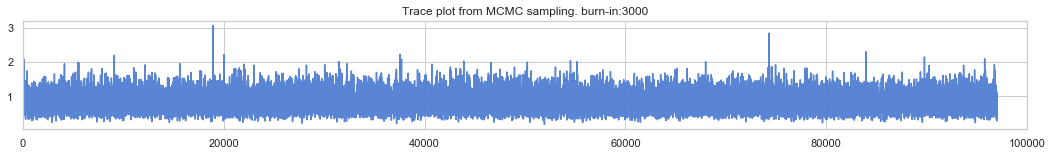

In [184]:

n_burn_in = 3000
plt.figure(figsize=(18,2))
plt.title("Trace plot from MCMC sampling. burn-in:{}".format(n_burn_in))
plt.xlim(0, 100000)
plt.plot(theta[n_burn_in:], alpha=0.9)

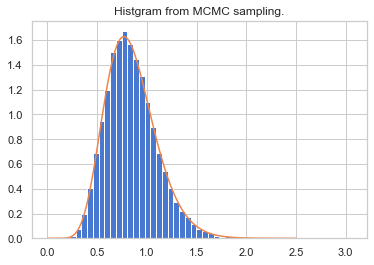

sample mean:0.84554, sample std:0.26244
mean:0.84615, std:0.25512


In [196]:
plt.title("Histgram from MCMC sampling.")
n, b, p = plt.hist(theta[n_burn_in:], bins=50, density=True)

xx = np.linspace(0, 2.5,501)
plt.plot(xx, st.gamma(11, 0, 1/13.).pdf(xx))
plt.show()

kk = 11.
tt = 13.
print ("sample mean:{0:.5f}, sample std:{1:.5f}".format(np.mean(theta), np.std(theta)))
# 理論期待値・分散
print("mean:{0:.5f}, std:{1:.5f}".format( kk/tt, np.sqrt(kk*((1/tt)**2))) )

In [195]:
a = rand_prop1(current)
a

0.99849382085705

In [188]:
current

0.9460114080536834

In [192]:
st.norm.rvs(current, prop_sd)

1.1984645578450621